# Data understanding

In [34]:
import pandas
import matplotlib.pyplot as pyplot
import seaborn

# Read in the data and display the first 5 columns
dataframe = pandas.read_csv('./calendar.csv')

# Set the date column to be a pandas datetime column
dataframe['date'] = pandas.to_datetime(dataframe['date'])
dataframe.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


# Prepare Data
The calendar data set includes the listing ID, calendar date, and whether the listing is available. Counting the number of unavailable dates in a give month should give an idea of the busiest months of year to visit Seattle.

In [35]:
# Check if there are any null values in the available or date columns
nullAvailability = dataframe['available'].isnull().sum()
nullDates = dataframe['date'].isnull().sum()

nullAvailability, nullDates

(0, 0)

There are no null dates, or availability values which makes data cleaning simple. Display a chart with availability by month

# Model data

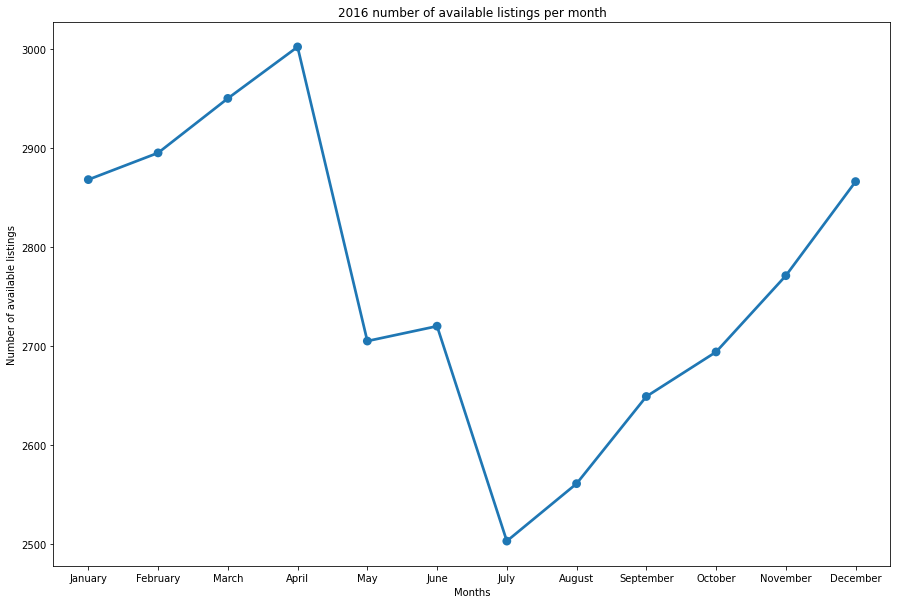

In [36]:
# Group by date, and availability
available_listings = dataframe.loc[dataframe['available'] == 't'].copy()

available_listings['month'] = pandas.to_datetime(available_listings['date']).dt.month
available_listings['year'] = pandas.to_datetime(available_listings['date']).dt.year

available_listings = available_listings.loc[available_listings['year'] == 2016].copy()

available_listings_per_month = pandas.Series([12])

for i in range(1, 13):
    available_listings_per_month[i] = len(available_listings.loc[available_listings['month'] == i]['listing_id'].unique())

available_listings_per_month = available_listings_per_month.drop(0)

labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


pyplot.subplots(figsize = (15,10))
seaborn.pointplot(x = labels, y = available_listings_per_month)
pyplot.ylabel('Number of available listings')
pyplot.xlabel('Months')
pyplot.title('2016 number of available listings per month')

pyplot.savefig('available_listings_per_month_2016.png')

# Evaluation
The graph shows that the months with the fewest vacancies are during the summer with July having the fewest. Therefore, the busiest time of the year to visit is during the Summer.